In [36]:
import pandas as pd
import numpy as np


In [37]:
dados = {'id_familia':[1,2,3,4,5,6,7,8],
         'tipo_casa': ["apartamento","casa","casa","kitnet","sobrado","apartamento","apartamento","casa"],
         'tamanho_casa': ["pequeno","médio","grande","pequeno","médio","grande","grande","pequeno"],
         'n_cartoes': [4,6,6,7,8,7,8,10],
         'tamanho_familia': [2,2,4,4,5,5,6,6],
         'renda_familiar':[14,16,14,17,18,21,17,25],
         'num_automoveis': [1,2,2,1,3,2,1,3],
         'distanciacentro': [22.2,3,31,2,1,12,2,4]}#km

df = pd.DataFrame(dados)
df.head()

,id_familia,tipo_casa,tamanho_casa,n_cartoes,tamanho_familia,renda_familiar,num_automoveis,distanciacentro
0,1,apartamento,pequeno,4,2,14,1,22.2
1,2,casa,médio,6,2,16,2,3.0
2,3,casa,grande,6,4,14,2,31.0
3,4,kitnet,pequeno,7,4,17,1,2.0
4,5,sobrado,médio,8,5,18,3,1.0


# Distribuição de frequências:

In [42]:
df.groupby('tipo_casa').count()[['id_familia']] # frequencia absoluta

,id_familia
tipo_casa,
apartamento,3
casa,3
kitnet,1
sobrado,1


In [44]:
df.groupby('tipo_casa').count()[['id_familia']]*100/df.shape[0]

,id_familia
tipo_casa,
apartamento,37.5
casa,37.5
kitnet,12.5
sobrado,12.5


In [46]:
df['tipo_casa'].value_counts()*100/df.shape[0]

casa           37.5
apartamento    37.5
sobrado        12.5
kitnet         12.5
Name: tipo_casa, dtype: float64

# Tabela de contingência

In [47]:
pd.crosstab(df['tipo_casa'], df['tamanho_casa'])

tamanho_casa,grande,médio,pequeno
tipo_casa,,,
apartamento,2,0,1
casa,1,1,1
kitnet,0,0,1
sobrado,0,1,0


In [49]:
pd.crosstab(df['tipo_casa'], df['tamanho_casa'])*100/df.shape[0]

tamanho_casa,grande,médio,pequeno
tipo_casa,,,
apartamento,25.0,0.0,12.5
casa,12.5,12.5,12.5
kitnet,0.0,0.0,12.5
sobrado,0.0,12.5,0.0


In [50]:
pd.crosstab(df['tipo_casa'], df['tamanho_casa'], margins=True)

tamanho_casa,grande,médio,pequeno,All
tipo_casa,,,,
apartamento,2,0,1,3
casa,1,1,1,3
kitnet,0,0,1,1
sobrado,0,1,0,1
All,3,2,3,8


# Gráfico de dispersão

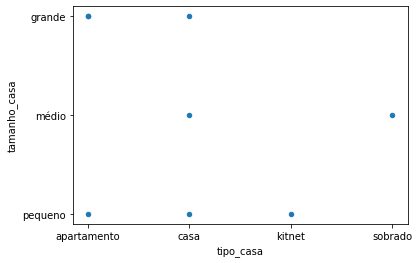

In [52]:
df.plot.scatter('tipo_casa', 'tamanho_casa')

In [62]:
from sklearn.datasets import load_wine
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['target'] = data.target
df_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


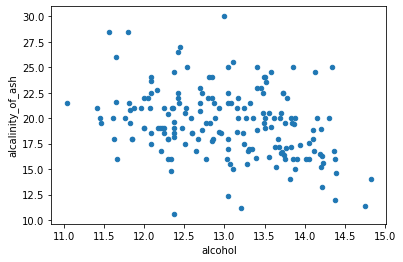

In [64]:
df_wine.plot.scatter('alcohol', 'alcalinity_of_ash')

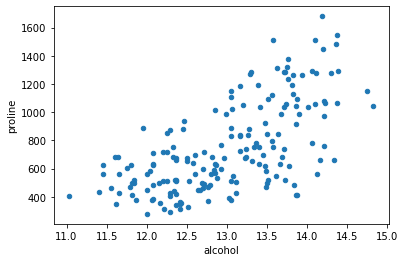

In [67]:
df_wine.plot.scatter('alcohol', 'proline')

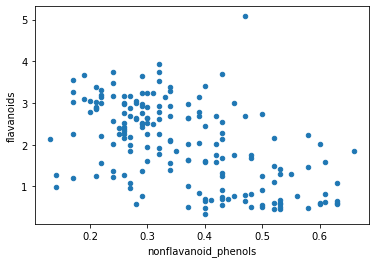

In [69]:
df_wine.plot.scatter('nonflavanoid_phenols', 'flavanoids')

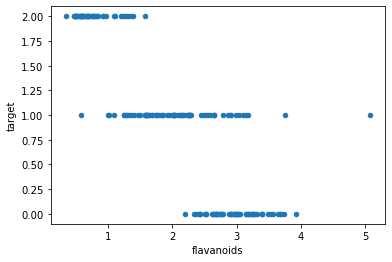

In [71]:
df_wine.plot.scatter('flavanoids', 'target')

# Correlação de pearson e Spearman

In [65]:
df_wine.corr() # pearson df_wine.corr(method='pearson') 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [70]:
df_wine.corr(method='spearman') 

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
alcohol,1.000000,0.140430,0.243722,-0.306598,0.365503,0.310920,0.294740,-0.162207,0.192734,0.635425,-0.024203,0.103050,0.633580,-0.354167
malic_acid,0.140430,1.000000,0.230674,0.304069,0.080188,-0.280225,-0.325202,0.255236,-0.244825,0.290307,-0.560265,-0.255185,-0.057466,0.346913
ash,0.243722,0.230674,1.000000,0.366374,0.361488,0.132193,0.078796,0.145583,0.024384,0.283047,-0.050183,-0.007500,0.253163,-0.053988
alcalinity_of_ash,-0.306598,0.304069,0.366374,1.000000,-0.169558,-0.376657,-0.443770,0.389390,-0.253695,-0.073776,-0.352507,-0.325890,-0.456090,0.569792
magnesium,0.365503,0.080188,0.361488,-0.169558,1.000000,0.246417,0.233167,-0.236786,0.173647,0.357029,0.036095,0.056963,0.507575,-0.250498
total_phenols,0.310920,-0.280225,0.132193,-0.376657,0.246417,1.000000,0.879404,-0.448013,0.666689,0.011162,0.439457,0.687207,0.419470,-0.726544
flavanoids,0.294740,-0.325202,0.078796,-0.443770,0.233167,0.879404,1.000000,-0.543897,0.730322,-0.042910,0.535430,0.741533,0.429904,-0.854908
nonflavanoid_phenols,-0.162207,0.255236,0.145583,0.389390,-0.236786,-0.448013,-0.543897,1.000000,-0.384629,0.059639,-0.267813,-0.494950,-0.270112,0.474205
proanthocyanins,0.192734,-0.244825,0.024384,-0.253695,0.173647,0.666689,0.730322,-0.384629,1.000000,-0.030947,0.342795,0.554031,0.308249,-0.570648
color_intensity,0.635425,0.290307,0.283047,-0.073776,0.357029,0.011162,-0.042910,0.059639,-0.030947,1.000000,-0.418522,-0.317516,0.457096,0.131170
